In [85]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

In [86]:
file_path = 'Output/rod2d25.txt'
nr_bins = 30
axis = 0

In [87]:
file = open(file_path)
lines = [line.rstrip('\n') for line in file]

In [88]:
N = int(lines[0].split(',')[0])
Timesteps = int((len(lines)-1)/N)
positions1 = list()
positions2 = list()
positions3 = list()

posititionsVec = list()

S1 = list()
S2 = list()
S3 = list()

T = list()
for t in range(0, Timesteps):
    
    centerPosition1 = list()
    centerPosition2 = list()
    centerPosition3 = list()
    centerVec = list()

    for i in range(0, N):
        
        #FIND POSITION
        line = lines[2 + (N+1)*t +i]
        line = line.replace('(','')
        line = line.replace(')','')
        elements = line.split(',')
        centerPosition1.append(float(elements[0]))
        centerPosition2.append(float(elements[1]))
        centerPosition3.append(float(elements[2]))
        centerVec.append(np.array([float(elements[0]),float(elements[1]),float(elements[2])]))
        
    #FIND S
    line = lines[1 + (N+1)*t]
    #line = line.replace('(','')
    #line = line.replace(')','')
    elements = line.split(',')
    S1.append(float(elements[4]))
    S2.append(float(elements[5]))
    S3.append(float(elements[6]))
    T.append(int(elements[3]))
        
    positions1.append(centerPosition1);
    positions2.append(centerPosition2);
    positions3.append(centerPosition3);
    posititionsVec.append(centerVec)



In [89]:
#for t in range(0,Timesteps):
#    n, bins, patches = plt.hist(positions[t],nr_bins, density=False)
#    plt.show()

In [90]:
def f(t=0):
    n, bins, patches = plt.hist(positions1[t],nr_bins, density=False)
    plt.xlabel('Position Of Center')
    plt.ylabel('Number Of HPBs')
    plt.show()
    
    n, bins, patches = plt.hist(positions2[t],nr_bins, density=False)
    plt.xlabel('Position Of Center')
    plt.ylabel('Number Of HPBs')
    plt.show()
    
    n, bins, patches = plt.hist(positions3[t],nr_bins, density=False)
    plt.xlabel('Position Of Center')
    plt.ylabel('Number Of HPBs')
    plt.show()
    
interactive_plot = interactive(f, t=(0, Timesteps-1))
interactive_plot

interactive(children=(IntSlider(value=0, description='t', max=25), Output()), _dom_classes=('widget-interact',…

In [91]:
single_axis = np.array([1,0,0])
single_axis = single_axis/np.linalg.norm(single_axis)
position_projections = list()
for i in posititionsVec:
    asd = list()
    for j in i:
        asd.append(np.dot(single_axis, j))
    position_projections.append(asd)
    

print(single_axis)
    
    
    
plt.savefig('rotations1.pdf')
    
def f2(t=0):    
    n, bins, patches = plt.hist(position_projections[t],nr_bins, density=False)
    plt.xlabel('Position Of Center')
    plt.ylabel('Number Of HPBs')
    plt.show()
    
interactive_plot = interactive(f2, t=(0, Timesteps-1))
interactive_plot

[1. 0. 0.]


interactive(children=(IntSlider(value=0, description='t', max=25), Output()), _dom_classes=('widget-interact',…

<Figure size 432x288 with 0 Axes>

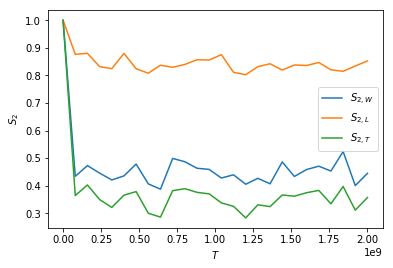

In [92]:
plt.plot(T, S1)
plt.plot(T, S2)
plt.plot(T, S3)


plt.ylabel("$S_2$")
plt.xlabel("$T$")

plt.legend(['$S_{2,W}$', '$S_{2,L}$', '$S_{2,T}$'])


plt.savefig('sphere_equilibrium_timesteps.pdf')

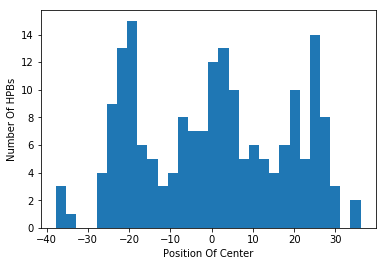

In [94]:
n, bins, patches = plt.hist(position_projections[t],nr_bins, density=False)
plt.xlabel('Position Of Center')
plt.ylabel('Number Of HPBs')
plt.savefig('r2d25_projection.pdf')
plt.show()
